Problem Statement

No Problem ..Relax ..Just analysing sample credit card data first

# Dataset acquisition

Get the datasetset from my github link as follows : 

Option 1- you can download the raw data in your local path along with notebook & run this script 
Option 2- you can look for another script that shows how to run same solution on github stored dataset by fetching the same. 

# Approach to solution

In [2]:
import os
import tarfile
import urllib
import pandas as pd 
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14,8


In [3]:
data_path="creditcard.csv"
df=pd.read_csv("creditcard.csv") # Better you keep the file in the same path as the notebook, else we need use different solution for customized data set path usage.
df.head(20)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [9]:
df.describe()# This command describes behaviour of the dataset such as central tendencies

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
df.shape #This shows the dataset has 284807 total Rows R X 31 total attributes  ( RxC)

(284807, 31)

Anomaly Detection starts now :
2 Different classes - Normal Data & Fraudulent Data classification of the credit card information under analysis.
2 classes ( each with probability 0.5 or 50% chance of occurrence)

In [15]:
anomaly = df[df.Class == 1] #This dataframe is holding records with Class attribute with value 1
normal = df[df.Class == 0] # This dataframe is holding records with class attribute with value 0 


In [16]:
print(f"Anomalies: {anomaly.shape}") # 492 records are with anomalies 
print(f"Normal: {normal.shape}") #284315 records are good or normal transaction.

Anomalies: (492, 31)
Normal: (284315, 31)


Above analysis pretty much shows bias towards normal data.could be a problem of overfitting 
which leads to the need of chhosing training, testing & validation dataset carefully to prevent overfitting or underfitting for that matter.

Text(0, 0.5, 'Counts')

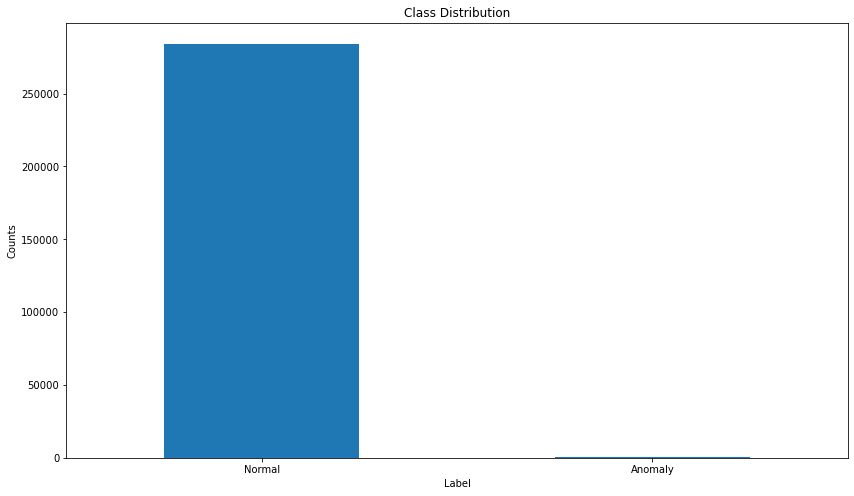

In [14]:
class_count = pd.value_counts(df['Class'], sort = True)
class_count.plot(kind = 'bar', rot=0)
plt.title('Class Distribution')
plt.xticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Label")
plt.ylabel("Counts")

Above data shows extreme difference between Normal & Anomaly classes of credit card data.

Let's now unerstand now some of the attributes individually.

Amounts !

In [17]:
anomaly.Amount.describe() #Check central tendencies of amounts related to Anomaly class credit card dataset.

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
normal.Amount.describe() #Check central tendencies of amounts related to Normal class credit card dataset.

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Both Normal & Anomaly dataset seem to be right skewed. What this means ? 
Let's understand this visually a bit better. 

In [11]:
#Let's Plot 
#Below function will help plot histogram of your data
def plot_histogram(df, bins, columns, log_scale=False):
    bins = 100
    anomaly= df[df.Class == 1]
    normal= df[df.Class == 0]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.suptitle(f'Counts of {column} by Class')
    
    ax1.hist(anomaly[column], bins = bins, color="red")
    ax1.set_title('Anomaly')
    
    ax2.hist(normal[column], bins=bins, color="green")
    ax2.set_title('Normal')
    
    plt.xlabel(f'{column}') 
    plt.ylabel('Count')
    if log_scale:
        plt.yscale('log')
    plt.xlim(np.min(df[column]), np.max(df[column]))
    plt.show()

In [7]:
#Below function will help plot scatterplot of your data
def plot_scatter(df, x_col, y_col, sharey = False):
    
    anomaly= df[df.Class == 1]
    normal= df[df.Class == 0]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.suptitle(f'Counts of {column} by Class')
    
    ax1.scatter(anomaly[x_col], anomaly[y_col], color="red")
    ax1.set_title('Anomaly')
    
    ax2.hist(normal[x_col], normal[y_col], color="green")
    ax2.set_title('Normal')
    
    plt.xlabel(x_col) 
    plt.ylabel(y_col)
    plt.show()

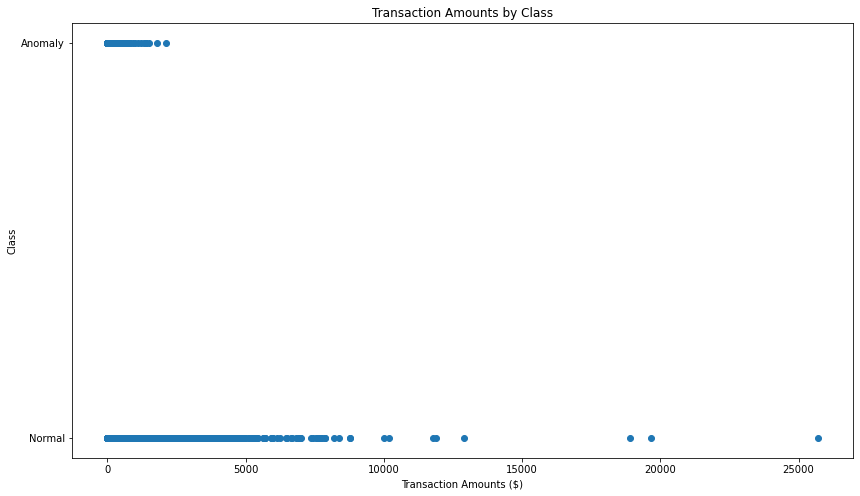

In [8]:
# Let's plot the dataframe for visualizing Amount by Class of credit card transactions by calling above functions
plt.scatter(df.Amount, df.Class)
plt.title("Transaction Amounts by Class")
plt.ylabel("Class") # Y Axis Class
plt.yticks(range(2), ["Normal", "Anomaly"]) #2 ranges for the classes.
plt.xlabel("Transaction Amounts ($)") #X Axis Amount
plt.show()

Looks like Normal dataset has good deal of outliers
Also the graph is bit flat..does not divulge much ! using scatter plot 
Let's try histogram now 

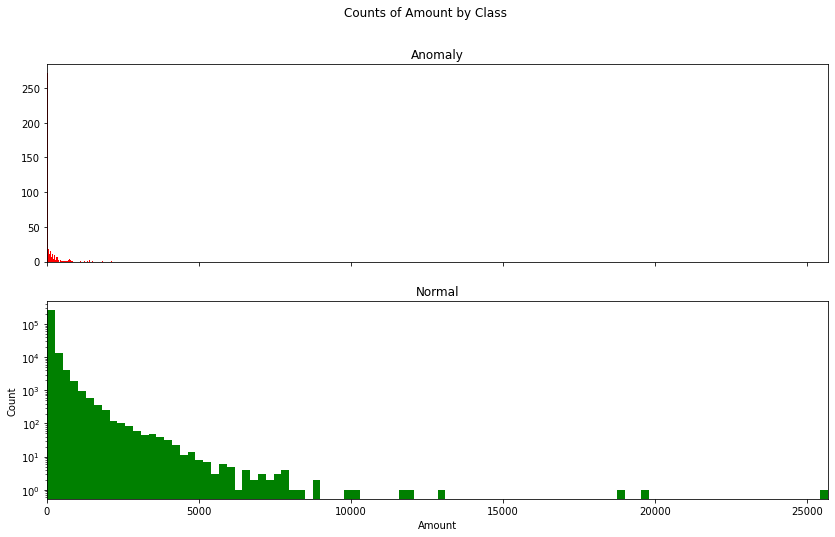

In [9]:
bins = 100
column = "Amount"
plot_histogram(df, bins, "Amount", log_scale=True)

you can see the data is right skewed & many outliers as you look at whole dataframe ( categorized in 2 classes as part of the dataframe 
Lets plot the histogram on Amount attribute to see its distribution in Anomaly dataset ( not on entire dataframe across classes)

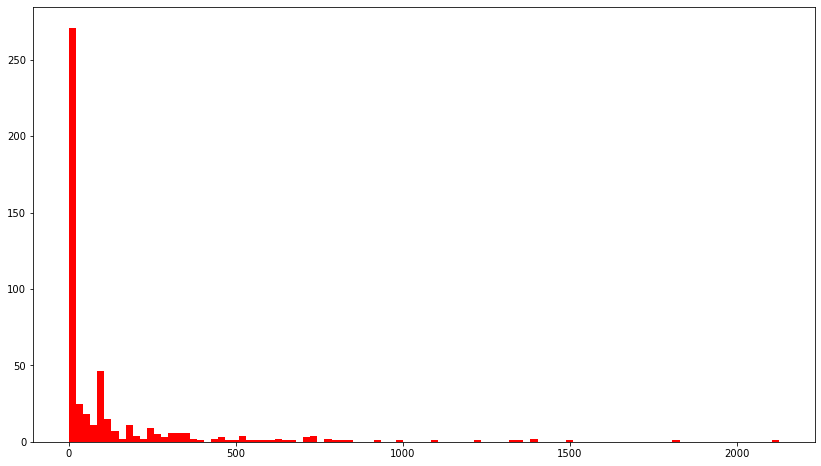

In [19]:
plt.hist(anomaly.Amount, bins = bins, color = "red")
plt.show()

While it was quite tough to see Anomaly data distribution  with full dataframe, with narrow focus on Amount attribute, we can see the data right skewed & more skewed than Normal portion of the dataframe.
Now what this means -- ( Right skewed !) 
This means large deal of Anomaly amounts have transactions less than mean of all anomalous transaction ( transactions amounts are low, hence not conclusive feature for decision

Let's do the same analysis with Time of transaction as a feature. 


In [ ]:
plt.scatter(df.Time, df.Class)
plt.title("Transaction history by Class")
